In [1]:
#import the necessary libraries
import pandas as pd#loading dataset, data manipulation
import numpy as np  #perform numeriacal calculations
import matplotlib.pyplot as plt #python visualisations
import seaborn as sns#statistical visualization
from scipy import stats#statistical inference
from statsmodels.stats.outliers_influence import variance_inflation_factor#checking multicollinearity
from statsmodels.tools.tools import add_constant#adding constant to the model
from statsmodels.formula.api import ols#linear regression
import statsmodels.api as sm#statistical models
from sklearn.preprocessing import LabelEncoder,StandardScaler#pre processing data before machine learning
from sklearn.model_selection import train_test_split, GridSearchCV#splitting the data,getting best parameters
from sklearn.linear_model import LinearRegression,Ridge,Lasso#linear regression models
from sklearn.tree import DecisionTreeRegressor#decision tree model
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor#ensemble models

In [2]:
#load the dataset
house_price_data=pd.read_csv("house_prices_dataset.csv")
house_price_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,zipcode,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,98001,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,98003,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,98002,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,98004,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,98005,47.701306,-122.416623,1314784.23


In [3]:
#perfoming investigations
house_price_data["waterfront"].value_counts()

waterfront
0    893
1    107
Name: count, dtype: int64

In [4]:
house_price_data["view"].value_counts()

view
1    265
0    259
3    250
2    226
Name: count, dtype: int64

In [5]:
house_price_data["condition"].value_counts()

condition
5    216
2    207
4    199
1    190
3    188
Name: count, dtype: int64

In [6]:
house_price_data["grade"].value_counts()

grade
12    111
1      95
3      91
10     90
8      86
4      85
5      80
9      80
6      76
11     75
7      72
2      59
Name: count, dtype: int64

In [7]:
#dropping an unnecessary column
house_price_data=house_price_data.drop("zipcode",axis=1)
house_price_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623,1314784.23


In [8]:
#ore information about our dataset
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        1000 non-null   int64  
 1   bathrooms       1000 non-null   int64  
 2   sqft_living     1000 non-null   int64  
 3   sqft_lot        1000 non-null   int64  
 4   floors          1000 non-null   int64  
 5   waterfront      1000 non-null   int64  
 6   view            1000 non-null   int64  
 7   condition       1000 non-null   int64  
 8   grade           1000 non-null   int64  
 9   year_built      1000 non-null   int64  
 10  year_renovated  1000 non-null   int64  
 11  lat             1000 non-null   float64
 12  long            1000 non-null   float64
 13  price           1000 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 109.5 KB


#### Explanatory data analysis 
##### .price distribution
- does the no of floor influence the price?
-does the year built affect the price of the house



In [9]:
#general statistics about the dataset
house_price_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2.988000,2.038000,2792.998000,5447.602000,1.501000,0.107000,1.467000,3.044000,6.651000,1985.746000,431.076000,47.443683,-122.009919,8.358796e+05
std,1.412746,0.819285,1288.747969,2614.572404,0.500249,0.309268,1.126135,1.424814,3.548773,20.809385,819.312098,0.198316,0.292534,3.271162e+05
min,1.000000,1.000000,600.000000,1001.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1950.000000,0.000000,47.100252,-122.497067,2.075845e+05
25%,2.000000,1.000000,1652.750000,3103.500000,1.000000,0.000000,0.000000,2.000000,4.000000,1968.000000,0.000000,47.275159,-122.259953,5.527969e+05
50%,3.000000,2.000000,2787.500000,5464.500000,2.000000,0.000000,1.000000,3.000000,7.000000,1986.000000,0.000000,47.450923,-122.024822,8.460296e+05
75%,4.000000,3.000000,3921.500000,7754.500000,2.000000,0.000000,2.250000,4.000000,10.000000,2004.000000,0.000000,47.609755,-121.748543,1.131182e+06
max,5.000000,3.000000,4996.000000,9992.000000,2.000000,1.000000,3.000000,5.000000,12.000000,2021.000000,2021.000000,47.798749,-121.500636,1.476859e+06


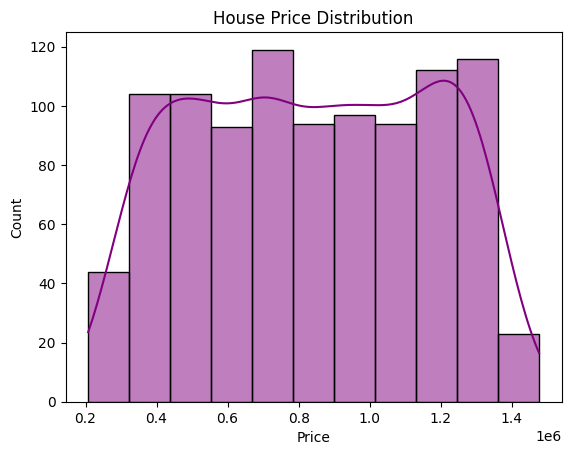

In [10]:
#price distribution
sns.histplot(data=house_price_data,x="price",color ="purple",kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

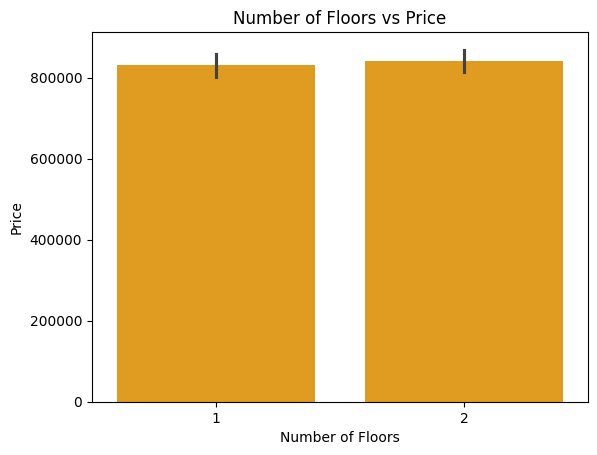

In [11]:
sns.barplot(data=house_price_data, x="floors", y="price", color="orange")
plt.title("Number of Floors vs Price")
plt.xlabel("Number of Floors")
plt.ylabel("Price")
plt.show()

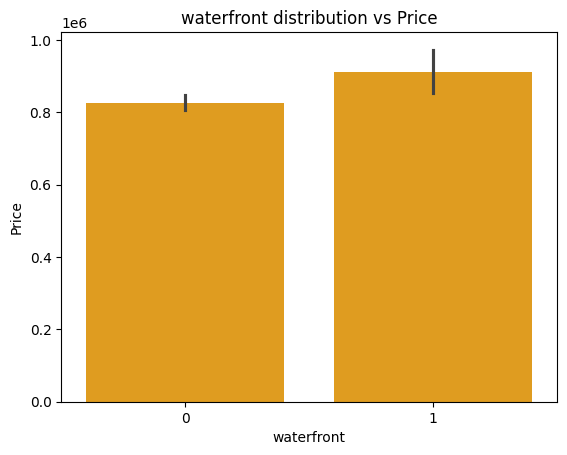

In [12]:
sns.barplot(data=house_price_data, x="waterfront", y="price", color="orange")
plt.title("waterfront distribution vs Price")
plt.xlabel("waterfront")
plt.ylabel("Price")
plt.show()

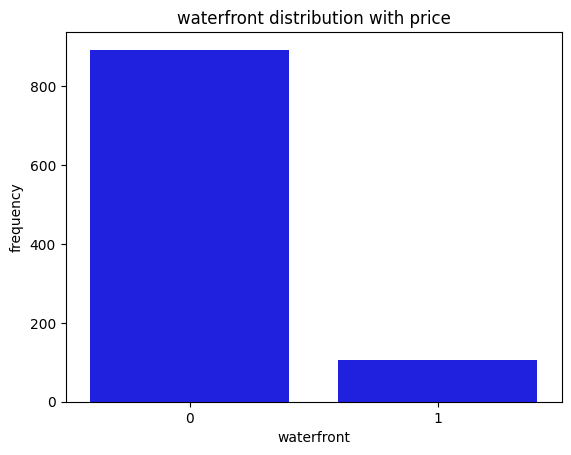

In [13]:
sns.countplot(data=house_price_data, x="waterfront", color="#0000FF")
plt.title("waterfront distribution with price")
plt.xlabel("waterfront")
plt.ylabel("frequency")
plt.show()

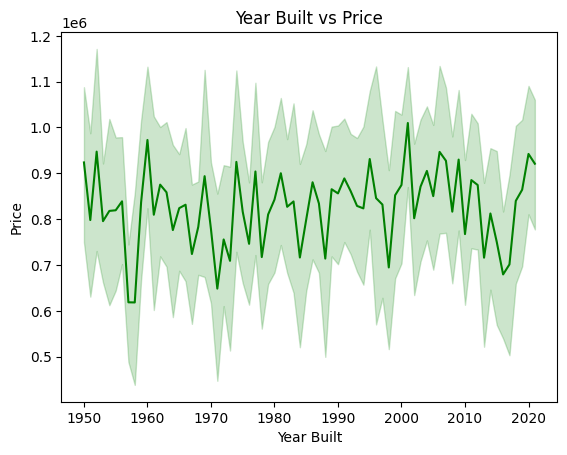

In [14]:
sns.lineplot(data=house_price_data, x="year_built",y="price",color="green")
plt.title("Year Built vs Price")
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

##### correlation analysis
- Relationship between the independent variables and dependent variables
#### interpreting correlation:
- perfect correlation = 1 
- no correlation =0
- strong positive correlation between 0.5 and 1
- weak positive correlation beteen 0 and 0.5
- week negative correlation btn -0.1 and 0.5

In [15]:
#pearon correlation coefficient
correlations =house_price_data.corr()
print (correlations)

                bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms        1.000000  -0.003930    -0.020278 -0.028367 -0.015563   
bathrooms      -0.003930   1.000000     0.030190  0.002061  0.043870   
sqft_living    -0.020278   0.030190     1.000000 -0.014612  0.008787   
sqft_lot       -0.028367   0.002061    -0.014612  1.000000  0.014753   
floors         -0.015563   0.043870     0.008787  0.014753  1.000000   
waterfront      0.044181   0.051097    -0.017256 -0.002951  0.041364   
view            0.009189   0.048013     0.055540 -0.100164  0.046257   
condition      -0.016148   0.049160     0.024721  0.021185 -0.007084   
grade           0.015536  -0.011960     0.004750  0.007995  0.029799   
year_built     -0.028739   0.012309     0.040945  0.013263 -0.010553   
year_renovated -0.049568  -0.018157    -0.024732  0.033545 -0.017841   
lat             0.036425  -0.012870    -0.038860 -0.019825 -0.021462   
long           -0.014820  -0.009914    -0.017699  0.135227  0.01

<Axes: >

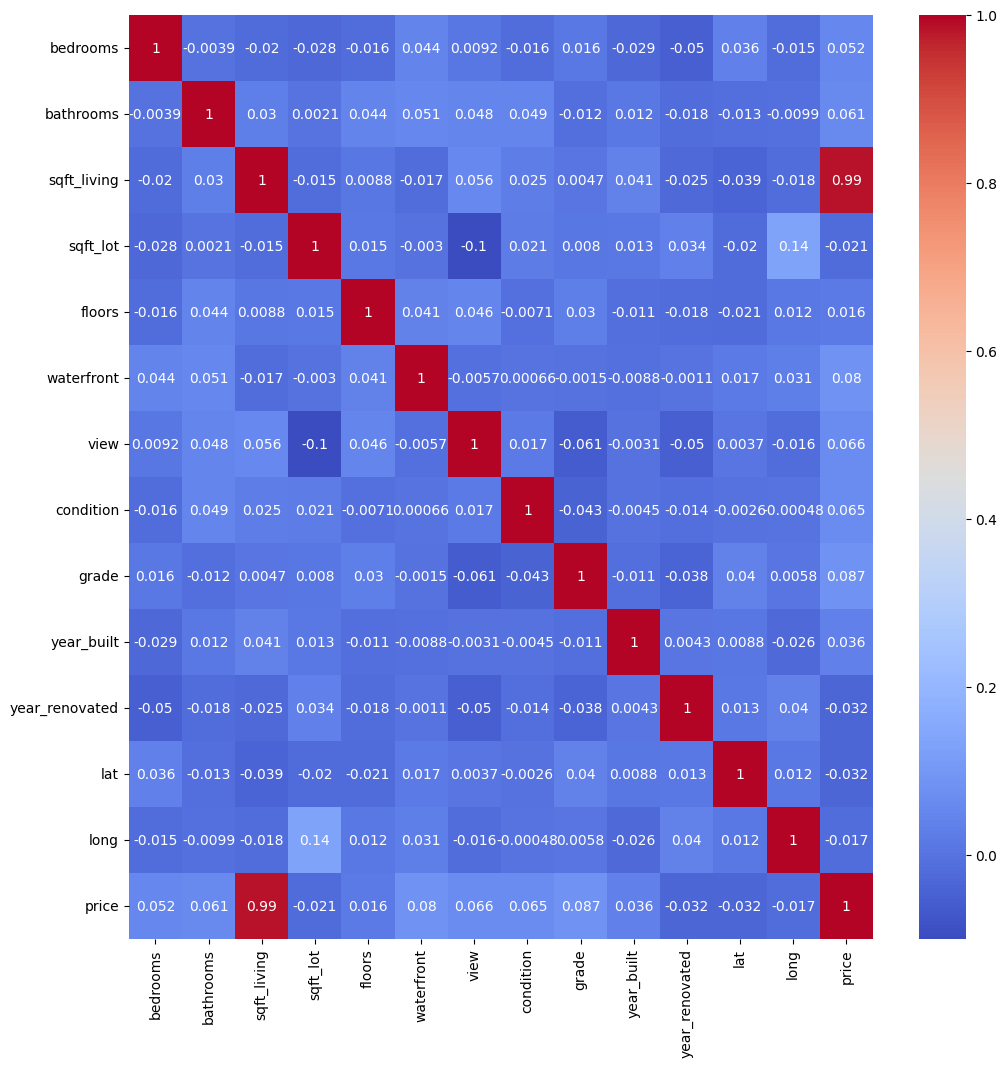

In [16]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=correlations,annot=True,cmap="coolwarm")

#### vif
- this can be used to check for multi collinearity
- multicollinearity -correlation between independent variables

In [17]:
#Extract the independent and dependent variables
y=house_price_data["price"]
x=house_price_data.drop("price",axis=1)# since we dont need it in the y now


In [18]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623


In [19]:
#variance inflation factor
x =add_constant(x)

#compute VIF
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print(vif_data)

           feature            VIF
0            const  245124.428644
1         bedrooms       1.008525
2        bathrooms       1.010433
3      sqft_living       1.009111
4         sqft_lot       1.031680
5           floors       1.008315
6       waterfront       1.008007
7             view       1.024047
8        condition       1.006046
9            grade       1.010532
10      year_built       1.004037
11  year_renovated       1.010107
12             lat       1.006233
13            long       1.022586


#### Anova (F-Statistic)
- Hypothesis testing
- Checking for significance of the independenct variables with relation to the dependent variable
- OLS to fit our model and get the f-statistic


In [20]:
formula ="price ~ bedrooms +bathrooms +sqft_living +sqft_lot +floors +year_built + lat +long + C(condition)+ C(view)+C(grade)+C(waterfront)"
lm=ols(formula, data=house_price_data).fit()
anova_table=sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                     sum_sq     df              F         PR(>F)
C(condition)   2.040391e+11    4.0     134.765379   1.306690e-91
C(view)        1.769828e+10    3.0      15.586001   6.595872e-10
C(grade)       7.624054e+11   11.0     183.112561  5.125431e-228
C(waterfront)  9.162758e+11    1.0    2420.756227  4.348415e-266
bedrooms       4.710309e+11    1.0    1244.440928  3.547309e-176
bathrooms      6.148754e+10    1.0     162.447111   1.614584e-34
sqft_living    1.014661e+14    1.0  268068.411671   0.000000e+00
sqft_lot       1.912651e+09    1.0       5.053132   2.480495e-02
floors         3.689312e+07    1.0       0.097470   7.549543e-01
year_built     4.465737e+06    1.0       0.011798   9.135265e-01
lat            1.151158e+08    1.0       0.304130   5.814314e-01
long           7.330768e+05    1.0       0.001937   9.649066e-01
Residual       3.679098e+11  972.0            NaN            NaN


In [21]:
#first convert the date to datetime format
#house_prices_data["year_renovated"] = pd.to_datetime(house_prices_data["year_renovated"])   
#house_prices_data.info()

In [23]:
#feature engineering since renovation
current_year=pd.Timestamp.now().year
house_price_data["year since renovation"]=current_year - house_price_data["year_renovated"]
house_price_data["year since renovation"]=house_price_data["year since renovation"].where(house_price_data["year_renovated"]>0,0)
house_price_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price,year since renovation
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347,835016.23,0
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515,326073.09,0
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089,1025404.09,63
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224,758764.79,63
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623,1314784.23,0


In [24]:
x=house_price_data.drop('price', axis=1)
x=add_constant(x)

vif_data=pd.DataFrame()
vif_data["Feature"]= x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
print(vif_data)

                  Feature            VIF
0                   const  245129.128832
1                bedrooms       1.013823
2               bathrooms       1.011420
3             sqft_living       1.009564
4                sqft_lot       1.031680
5                  floors       1.008520
6              waterfront       1.011411
7                    view       1.024152
8               condition       1.012444
9                   grade       1.013428
10             year_built       1.004342
11         year_renovated       3.926888
12                    lat       1.006288
13                   long       1.022625
14  year since renovation       3.913710


In [25]:
x=x.drop('year_renovated', axis=1)
x=add_constant(x)

vif_data=pd.DataFrame()
vif_data["Feature"]= x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
print(vif_data)

                  Feature            VIF
0                   const  245112.406652
1                bedrooms       1.006154
2               bathrooms       1.011025
3             sqft_living       1.008733
4                sqft_lot       1.031534
5                  floors       1.008497
6              waterfront       1.008859
7                    view       1.023083
8               condition       1.006595
9                   grade       1.008901
10             year_built       1.004057
11                    lat       1.006286
12                   long       1.022462
13  year since renovation       1.006717


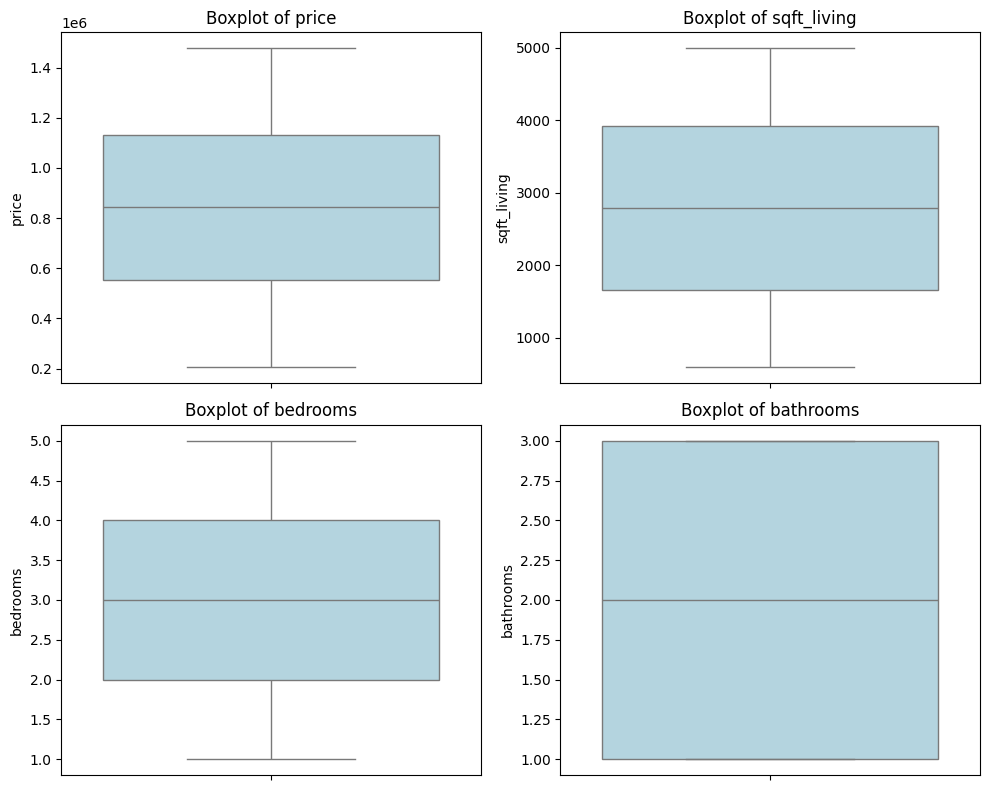

In [26]:
# Select numeric columns to visualize
numeric_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loop through each numeric column and create a boxplot
for ax, col in zip(axes.flat, numeric_cols):
    sns.boxplot(y=house_price_data[col], ax=ax, color='lightblue')
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel(col)

# Adjust layout and display
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8144\1224168003.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')


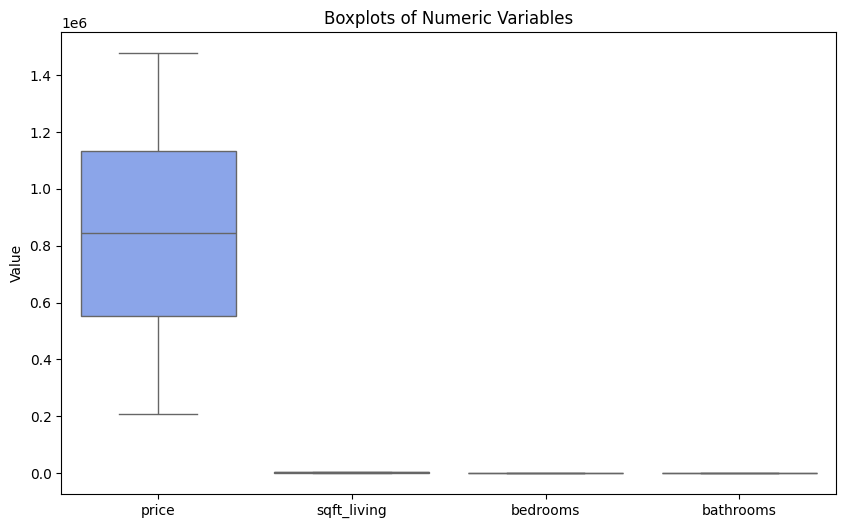

In [27]:
numeric_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms']

# Melt data into long format
house_prices_melted = house_price_data[numeric_cols].melt(var_name='Variable', value_name='Value')

# Plot all boxplots in one chart
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')
plt.title('Boxplots of Numeric Variables')
plt.xlabel('')
plt.ylabel('Value')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8144\2823436404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Scaled Value', data=scaled_melted, palette='viridis')


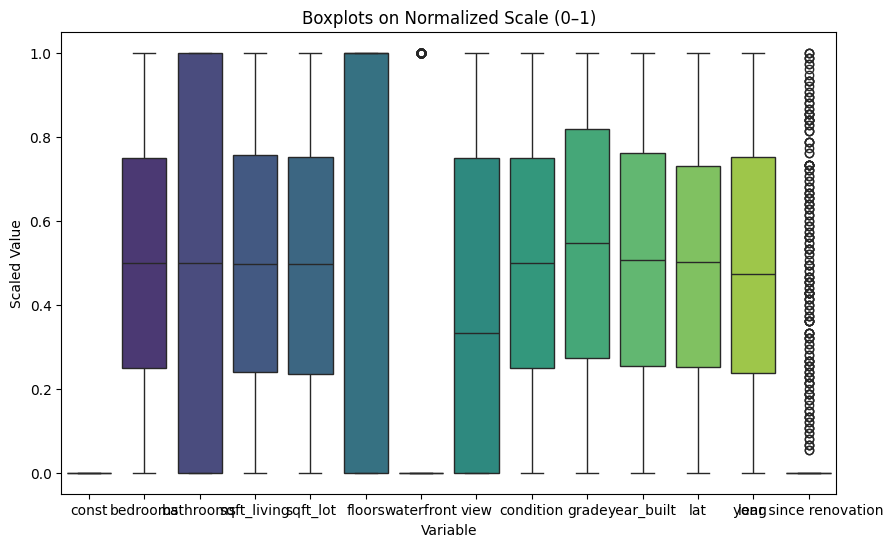

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform your numeric dataset (replace x with your numeric dataframe)
data_scaled = min_max_scaler.fit_transform(x)

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(data_scaled, columns=x.columns)

# Melt the DataFrame for visualization
scaled_melted = scaled_df.melt(var_name='Variable', value_name='Scaled Value')

# Plot normalized boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Scaled Value', data=scaled_melted, palette='viridis')
plt.title('Boxplots on Normalized Scale (0–1)')
plt.show()

In [29]:
price_normalised=np.log(y)
y_transformed=pd.Series(price_normalised)
print(y_transformed)

0      13.635206
1      12.694877
2      13.840597
3      13.539447
4      14.089183
         ...    
995    13.453856
996    13.994396
997    13.443744
998    12.987000
999    12.420902
Name: price, Length: 1000, dtype: float64
